In [2]:
import pandas as pd 
import numpy as nb 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import re

In [4]:
df=pd.read_csv("listings.csv")

In [5]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057
2,41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22,HUTB-003549


In [6]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [7]:
df.shape

(17230, 18)

In [8]:
nulll=df.isnull().sum()

In [9]:
nulll

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4032
reviews_per_month                 4032
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8368
dtype: int64

In [10]:
df.duplicated().sum()

0

####  categorizing our columns and try to understand them  after understanding the dataset and bussines documentation

### we will focus on the core columns and exclude other related to locaion and id for now just to describe them

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17230 non-null  int64  
 1   name                            17230 non-null  object 
 2   host_id                         17230 non-null  int64  
 3   host_name                       17228 non-null  object 
 4   neighbourhood_group             17230 non-null  object 
 5   neighbourhood                   17230 non-null  object 
 6   latitude                        17230 non-null  float64
 7   longitude                       17230 non-null  float64
 8   room_type                       17230 non-null  object 
 9   price                           17230 non-null  int64  
 10  minimum_nights                  17230 non-null  int64  
 11  number_of_reviews               17230 non-null  int64  
 12  last_review                     

In [12]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [15]:
colmns_to_describe=['room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']
df[colmns_to_describe].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17230.000000,17230.000000,17230.000000,13198.000000,17230.000000,17230.000000,17230.000000
mean,177.689959,14.375218,42.310215,1.438544,28.073244,172.454208,11.988799
std,876.724391,33.905670,83.509961,1.839384,53.164134,124.998430,23.295948
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,0.230000,1.000000,56.000000,0.000000
50%,111.000000,3.000000,7.000000,0.870000,5.000000,171.000000,2.000000
75%,214.000000,31.000000,43.000000,2.100000,25.000000,293.000000,16.000000
max,90000.000000,1125.000000,1751.000000,50.640000,265.000000,365.000000,768.000000


#####             --------  our columns types ------------
* Categorical  : name, host_name, neighbourhood_group, neighbourhood, room_type, price ...
* Numerical : id, host_id, price, minimum_nights, number_of_reviews, reviews_per_month, *calculated_host_listings_count,availability_365 .....
* Date : last_review

In [16]:
### lets check the unique and group the categories 

print("id unique values ",df['id'].nunique())
print("host_id unique values ",df['host_id'].nunique())

### all good for the id unique values

id unique values  17230
host_id unique values  6705


In [17]:
print('neighbourhood_group unique ::',(df['neighbourhood_group'].unique()))

neighbourhood_group unique :: ['Eixample' 'Sant Martí' 'Gràcia' 'Ciutat Vella' 'Sant Andreu'
 'Sarrià-Sant Gervasi' 'Sants-Montjuïc' 'Horta-Guinardó' 'Les Corts'
 'Nou Barris']


In [18]:
df["room_type"].value_counts() 
# the top room type is entire home/apt , least is hotel room

Entire home/apt    10262
Private room        6675
Shared room          150
Hotel room           143
Name: room_type, dtype: int64

### lets clean our dataset and handle the null

In [19]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057


In [20]:
# start with host name and replace with 'No _name'
df['host_name'].fillna('no_name',inplace=True)

In [21]:
df['host_name'].isnull().sum()

0

In [22]:
#now with reviews_per_month replace  .. then the licsence
df['reviews_per_month'].fillna(0,inplace=True)

In [23]:
df['reviews_per_month'].isnull().sum()

0

In [24]:
df['license'].fillna('no_licsence',inplace=True)

In [25]:
#check
df.license.isnull().sum()

0

In [26]:
#by logic since we no reviews per month then last review is null so we will leave it for now 

In [27]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
17225,909333050152586756,Rental unit in Barcelona · ★New · 1 bedroom · ...,492807178,Rosa,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389625,2.179024,Private room,65,1,0,NaN,0.0,33,365,0,Exempt
17226,909347845538314221,Rental unit in Barcelona · ★New · 2 bedrooms ·...,239550764,Jaye Anne,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,41.403783,2.136933,Entire home/apt,63,31,0,NaN,0.0,23,145,0,no_licsence
17227,909355184941954314,Rental unit in Barcelona · ★New · 1 bedroom · ...,492807178,Rosa,Ciutat Vella,el Barri Gòtic,41.384334,2.175138,Private room,65,1,0,NaN,0.0,33,361,0,Exempt
17228,909364014604079283,Rental unit in Barcelona · ★New · 1 bedroom · ...,492807178,Rosa,Ciutat Vella,el Raval,41.376588,2.174328,Entire home/apt,100,1,0,NaN,0.0,33,355,0,Exempt
17229,909387630966968007,Rental unit in Barcelona · ★New · 1 bedroom · ...,492807178,Rosa,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.390315,2.178998,Private room,65,1,0,NaN,0.0,33,359,0,Exempt


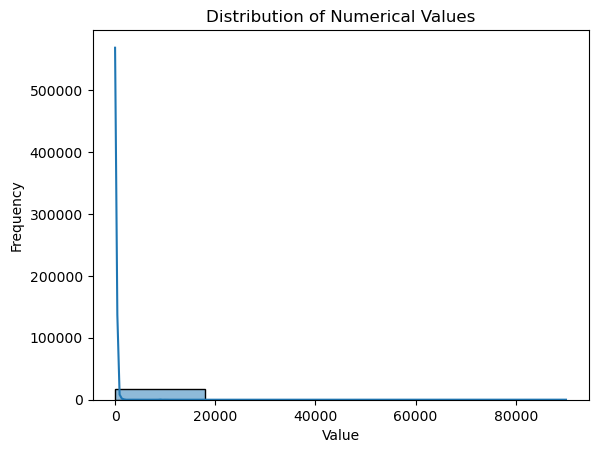

In [28]:
## lets chech some outliers in the price and other
sns.histplot(df['price'], bins=5, kde=True)  # bins is the number of bins, kde adds a kernel density estimate
plt.title("Distribution of Numerical Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [29]:
# we have price=0 values dosent seem right 
filterd_rowws= df[(df["price"]==0)].index
df.drop(filterd_rowws, inplace = True)

In [30]:
df[(df["price"]==0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17229 entries, 0 to 17229
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17229 non-null  int64  
 1   name                            17229 non-null  object 
 2   host_id                         17229 non-null  int64  
 3   host_name                       17229 non-null  object 
 4   neighbourhood_group             17229 non-null  object 
 5   neighbourhood                   17229 non-null  object 
 6   latitude                        17229 non-null  float64
 7   longitude                       17229 non-null  float64
 8   room_type                       17229 non-null  object 
 9   price                           17229 non-null  int64  
 10  minimum_nights                  17229 non-null  int64  
 11  number_of_reviews               17229 non-null  int64  
 12  last_review                     

# lets visualize and group the interesting data we have 

Text(0.5, 1.0, 'number of room types')

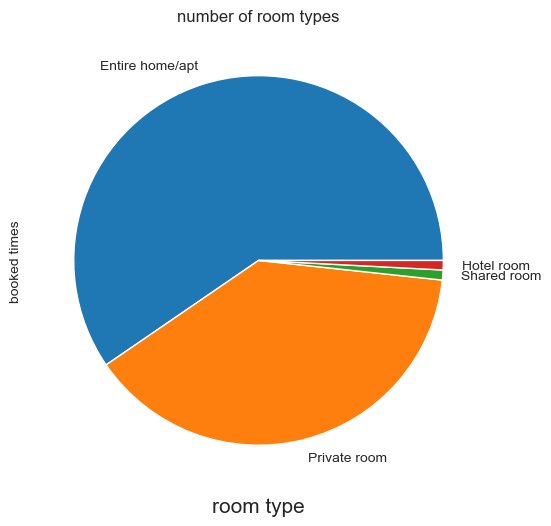

In [53]:
# our top rooms type 
top_rooms= df['room_type'].value_counts()
chart1 = top_rooms.plot.pie(figsize = (6,6), fontsize = 10)
chart1.set_xlabel("room type", fontsize = 15)
chart1.set_ylabel("booked times", fontsize = 10)
chart1.set_title("number of room types", fontsize = 12)

### insights :-
- we can see that private rooms and entire home are taking the lion share of the booked units  
- this could be valuable insight to look about 
- as it seems that these are the best options for the visitors '

Text(0.5, 1.0, 'average price in all room types')

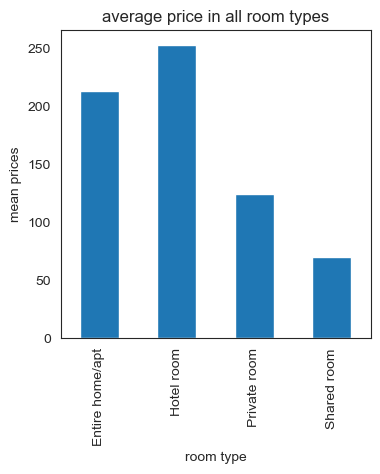

In [56]:
# our room types and thier mean prices 
roomvsprice = df.groupby(["room_type"])["price"].mean()
chart2 = roomvsprice.plot.bar(figsize = (4,4), fontsize = 10)
chart2.set_xlabel("room type", fontsize = 10)
chart2.set_ylabel("mean prices", fontsize = 10)
chart2.set_title("average price in all room types", fontsize = 12)

### insights :-
- the highest prices are the hotel room prices . 
- the lowest are shared room and privet room
- home are average 

Text(0.5, 1.0, 'average nights spent in all room types')

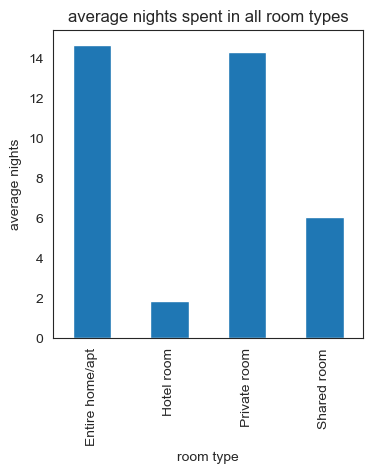

In [57]:
#nights spent in room_types
nights=df.groupby('room_type')['minimum_nights'].mean()
chart3 = nights.plot.bar(figsize = (4,4), fontsize = 10)
chart3.set_xlabel("room type", fontsize = 10)
chart3.set_ylabel("average nights", fontsize = 10)
chart3.set_title("average nights spent in all room types", fontsize = 12)

## room_types conclusion

### insights :-
- the hotel room is good for 1 , 2 days spent .
- the Entire/Home and private room are excellent choice for long residance .

## neighbourhood investigate 

Text(0.5, 1.0, 'Top 10 neighbourhoods ')

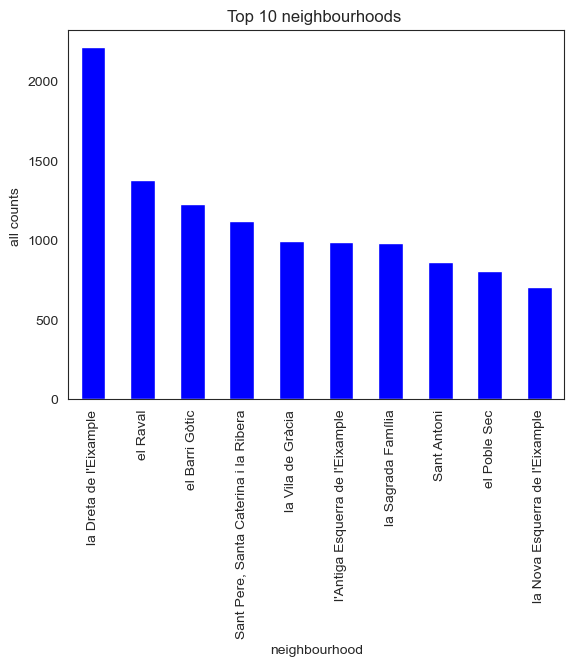

In [58]:
# Chart - 1 visualization code
top_20_neigbours= df['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods 
top_20_neigbours.plot(kind='bar',color='blue')
plt.xlabel('neighbourhood')
plt.ylabel('all counts ')
plt.title('Top 10 neighbourhoods ')


### insights :-
- the top booked is la Derta de l'Example 
- the second most booked neighbourhood is elRaval 

Text(0.5, 1.0, 'average price in neighbourhoods')

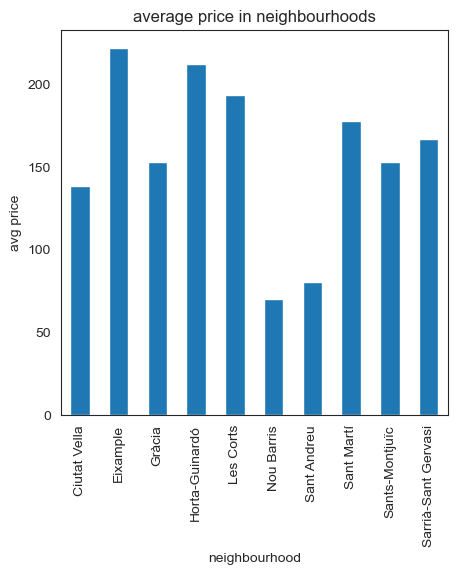

In [59]:
# neighbourhood Vs avg prices

avg_price = df.groupby(["neighbourhood_group"])["price"].mean()
ch = avg_price.plot.bar(figsize = (5,5), fontsize = 10)
ch.set_xlabel("neighbourhood")
ch.set_ylabel("avg price")
ch.set_title("average price in neighbourhoods")

### insights :-
- the highest prices are in Example 
- the lowest in les corts 


C:\Users\MohamedII\AppData\Local\Temp\ipykernel_2256\324562055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'kendall')


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

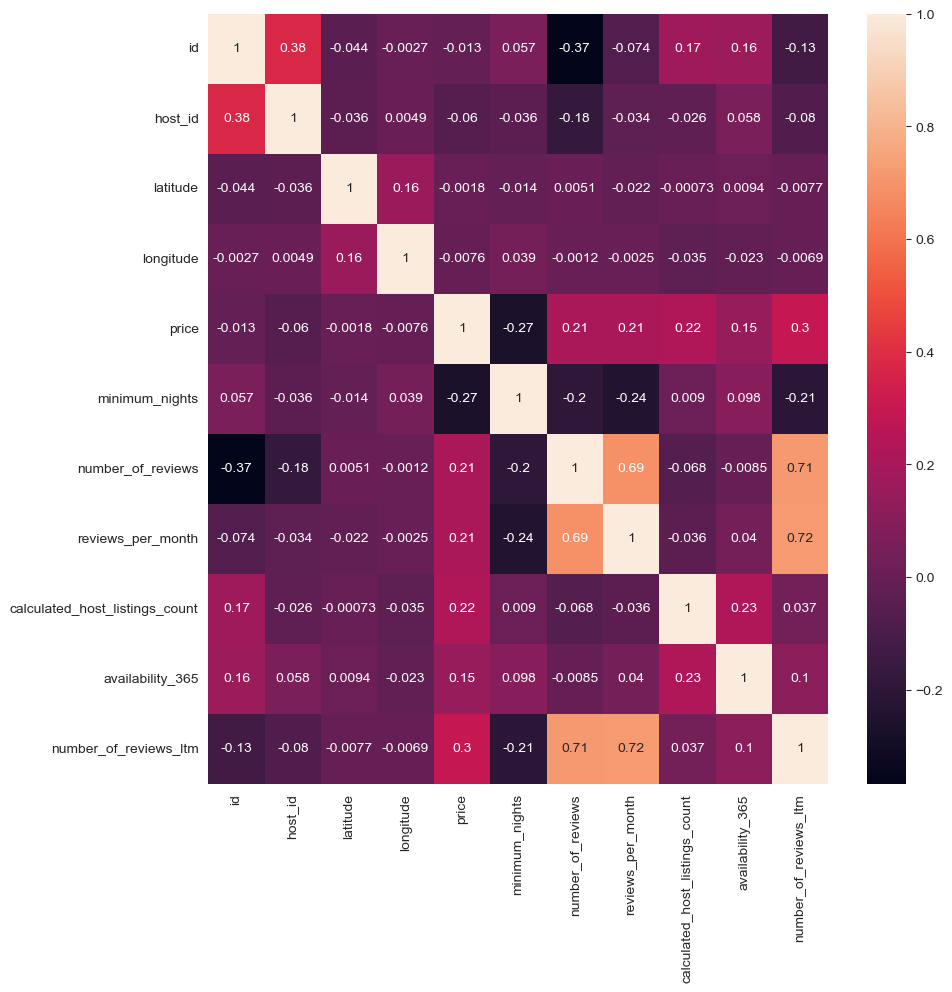

In [60]:

corr = df.corr(method = 'kendall')
plt.figure(figsize= (10,10))
sns.heatmap(corr, annot =True)
df.columns

### insights :-
- we can ignore the id and location values 
- 1 is a very high correlation coeff and its very positive between 2 varibles and -1 is the lowest and neg- relationship 
- 0.3 is pos+ relation between price and number of reveiws 
- also negative relation between price and minimum nights wcich means high minimum nights consraint from the hoster comes with a low price .


In [61]:
# our Top 10 hosters as a dataframe
count_host_id = list(df['host_id'].value_counts())
host_id = list(df.host_id)
listing_count= list(zip(host_id,count_host_id))
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={0:'Host_Id',1:'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id

,Host_Id,Counts
0,71615,265
1,90417,215
2,183340,190
3,135703,149
4,90417,141
5,135703,138
6,366428,134
7,366654,133
8,368317,131
9,73163,129


[Text(0, 0, '71615'),
 Text(1, 0, '90417'),
 Text(2, 0, '183340'),
 Text(3, 0, '135703'),
 Text(4, 0, '90417'),
 Text(5, 0, '135703'),
 Text(6, 0, '366428'),
 Text(7, 0, '366654'),
 Text(8, 0, '368317'),
 Text(9, 0, '73163')]

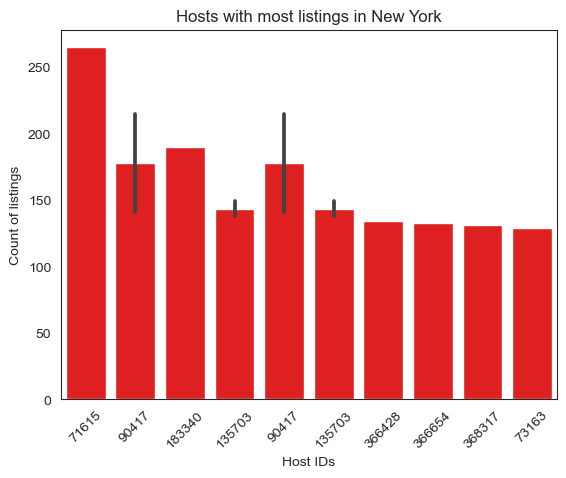

In [62]:
# now 
sns.set_style('white')


a = sns.barplot(x= 'Host_Id', y= 'Counts', color='r', data=top_host_id,
                      order=top_host_id.sort_values('Counts',ascending = False).Host_Id)

a.set_title('Hosts with most listings in New York')


a.set_xlabel('Host IDs')
a.set_ylabel('Count of listings')

a.set_xticklabels(a.get_xticklabels(), rotation=45)


### insights :-
- we can see our top Hosters overall
- this is a valuable insight since we can encourage the top hosters with a prize system . 

# Final Conclusion 
- the highest prices are in Example .
- the lowest in les corts .
- high minimum nights consraint from the hoster comes with a low price .
-  price and number of reveiws have a unique pos+ relation wchich means that high number of reviews encourages the hosters to    put high prices for their units and vica versa .
- the highest prices are the hotel room prices . 
- the lowest are shared room and privet room .
- we can see that private rooms and entire home are taking the lion share of the booked units  .
- as it seems that private rooms and entire home are the best options for the visitors .
- we also had our top  10 hosters .

